In [1]:
import xarray as xr
import rioxarray as rio
import geopandas as gpd
import numpy as np

## Read Data

In [2]:
predict_temp_bott_fp="../data/bottom_sst_predictions/predicted_bottom_temp.tif"
coral_fp="../data/benthic_cover/coral.geojson"
sand_fp="../data/benthic_cover/sand.geojson"
depth_fp="../data/bathymetry/gebco_2024_n23.2842_s21.6651_w112.5659_e114.5956.tif"


predict_temp_bott=rio.open_rasterio(predict_temp_bott_fp)
depth=rio.open_rasterio(depth_fp)
coral=gpd.read_file(coral_fp)
sand=gpd.read_file(sand_fp)

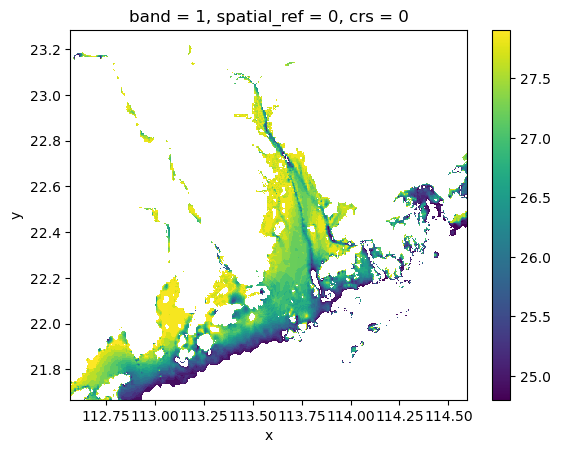

In [7]:
mask=predict_temp_bott.where((depth>-21) & (depth < 0))
mask = mask.rio.clip(geometries=coral.geometries.values)

## Retrieve Mean Bottom Temperature (Predicted) for each Coral Polygon

In [76]:


def polygon_mean(poly, raster):
    poly=poly.__geo_interface__
    try:
        return float(predict_temp_bott.rio.clip([poly], all_touched=True, crs=coral.crs).mean())
    except:
        return np.nan

# coral["mean_pred_temp_bott"]=coral.apply(lambda poly: polygon_mean(poly.geometry, raster=predict_temp_bott),axis=1)
sand["mean_pred_temp_bott"]=sand.apply(lambda poly: polygon_mean(poly.geometry, raster=predict_temp_bott),axis=1)

c:\Users\medo_\miniconda3\envs\geoai\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [80]:
# Normalize Predicted Bottom Temperature Data with Z-score
mn=float(predict_temp_bott.mean())
sd=float(predict_temp_bott.std())

# coral["z_score"]=coral.mean_pred_temp_bott.apply(lambda tmp: (tmp - mn) / sd)
# coral.dropna(inplace=True)


# Normalize Predicted Bottom Temperature Data with Z-score
mn=sand.mean_pred_temp_bott.mean()
sd=sand.mean_pred_temp_bott.std()

sand["z_score"]=sand.mean_pred_temp_bott.apply(lambda tmp: (tmp - mn) / sd)
sand.dropna(inplace=True)


c:\Users\medo_\miniconda3\envs\geoai\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\medo_\AppData\Local\Temp\ipykernel_25768\582430707.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sand.dropna(inplace=True)


In [81]:
# coral.to_file("../data/coral_risk/coral_risk.geojson")
sand.to_file("../data/coral_risk/sand_hope_spots.geojson")